# Self-Driving Car Engineer Nanodegree
## Deep Learning
## Project: Build a Traffic Sign Recognition Classifier

**Author:** Bryan Rosales

**Date:** July 7th 2017

## Project Description:
To build and train a Convolutional Neural Network to predict traffic sign using the Germany Data set Traffic Signs. The network should have an accuracy greater than 93% when validating the test data set.

## Reflection
The pipeline proposed to the solution consisted of 5 steps:
 1. Data Loading and Visualization
 2. Preprocessing
 3. Model Architecture and Training
 4. Predicting new Images
 5. Softmax probabilities of the new images

## Step 1: Data Loading and Visualization
The data was extracted from pickles files and accessed through a dictionary. The raw data included 3 datasets with features and labels respectively:
 1. Training Data
 2. Validation Data
 3. Test Data
 

### Summary of the Data Set

**Number of Examples for each type of Data:**

 - Number of training examples = 34799
 - Number of testing examples = 12630
 - Number of validation examples = 4410
 - Image data shape = (32, 32, 3)
 - Number of classes= 43
 
 Notice that the images are full color scale (3 channels), width = 32 pixels and height = 32 pixels 

### Examples for each Class

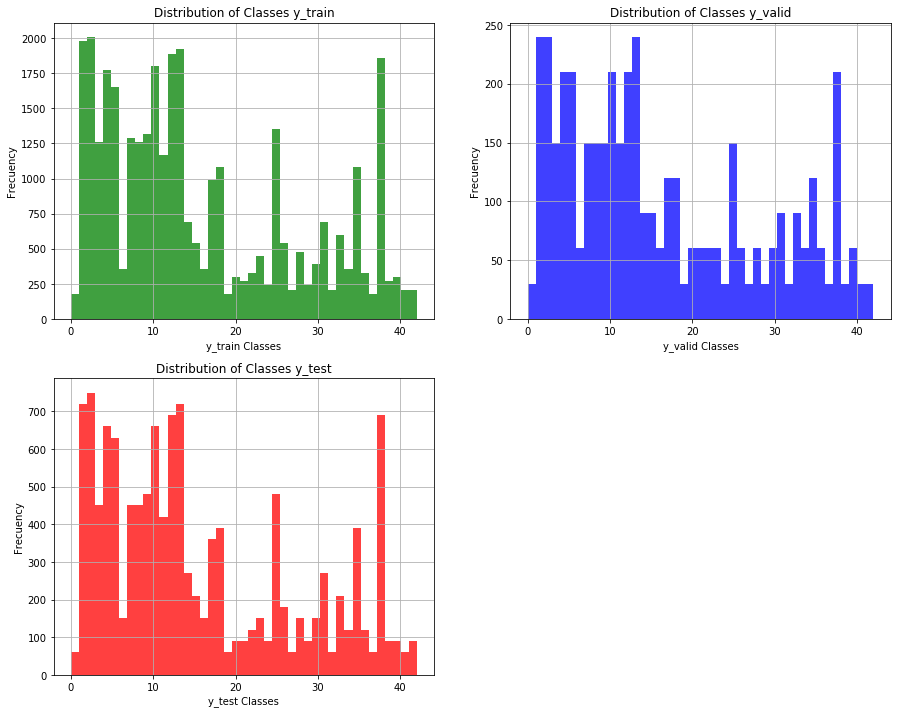

In [34]:
Histogram for each dataset showing the distribution of classes

## Note:
The frecuency for some classes is poor in the training dataset. However, it was not neccesary to increase in order to meet the projects requirements. To improve the accuracy of the model, the augmentation of samples images for poor classes is a key factor to keeping in mind.

----

## Step 2: Preprocessing

In order to obtain a high accuraccy, some changes were made to the images. Here, I summary suches modifications:
 1. The images were converted to gray scale using the library OpenCV.
 2. The Clahe Contrast (Contrast-limited adaptive histogram equalization (CLAHE) ) was applied because many images were very dark and then the network was not able to learn from suches pictures.
 3. All the images were normalized using (Xset-128)/256 which result in pixels ranging between -0.5 and 0.5.
 
 The next is a example of how are the images after preprocessing:

Set Shape: (34799, 32, 32)
Images Processed:  0
Images Processed:  4000
Images Processed:  8000
Images Processed:  12000
Images Processed:  16000
Images Processed:  20000
Images Processed:  24000
Images Processed:  28000
Images Processed:  32000
(34799, 32, 32, 1)


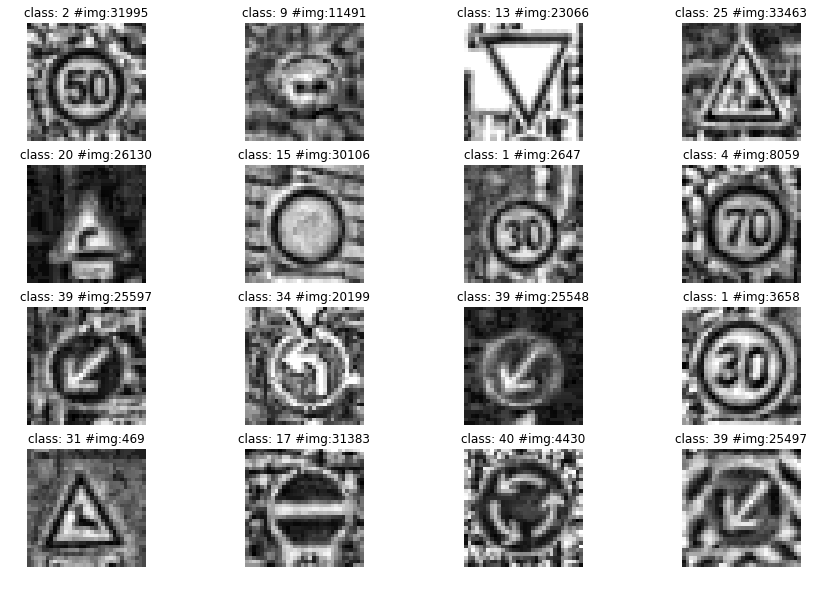

In [6]:
X_train = preProcessing(X_train)
print(X_train.shape)
X_train = normalization(X_train)
displayImg(X_train, y_train)

## Step 3: Model Architecture and Training


### Setup Hyperparameters
- EPOCHS = 10
- BATCH_SIZE = 150
- Learning rate = 0.001

### Model Architecture

The first architecture used for this project was LeNet (2 Convolutional Layers and 2 Fully Connected), but after several hours of simulations and changing parameters (Learning rate, Epochs and Batch size) the maximum accuracy obtained was 0.69. Then, I began a research on internet to discover others approaches and as well I read the paper suggested by Udacity. I understood that the data must be improved and Clahe was a good option because it was easy to implement and fast. In addition, I decided change my model architecture following the architecture proposed in the paper of Sermanet. When I implemented the Clahe contrast and the new architecture, my model started increasing substantially the accuracy. I tried several learning rates like 0.005, 0.003, 0.01 but they did not avoid the overfitting. Then, 0.001 was the best result that I got. Also, I increased my Batch size from 128 to 150 and it made my model a little bit faster in the processing stage. Since I am running on my laptop, every increase of speed is significant.
The main reason by which I turned on Sermanet's arquitecture my model was because they were skipped some layers and it made that the model learnt faster some difficult shapes and therefore increased accuracy.


## Overview
The arquitecture used was based on the paper "Traffic Sign Recognition with Multi-Scale Convolutional Networks" by
Pierre Sermanet and Yann LeCun, Courant Institute of Mathematical Sciences, New York University. They obtained great results skiping layers of convolution in some stages. The main advantage of the arquitecture is that can extract different shape of the pictures increasing the learning process.

## Input
The P2 architecture accepts a 32x32x1 image as input, where 1 indicates that the image is in gray color.
Also, the images were normalized with a mean 0 and range between -0.5 to 0.5.

Architecture

## Layer 1:
**Convolutional:** Input: 32x32x1, Output: 28x28x6, Kernel 5x5x1, Stride 1,1

**Activation:** Relu (Sigmoid Function)

**Pooling:** Input: 28x28x6, Output: 14x14x6, Kernel: 2x2, Stride = 2,2

## Layer 2:
**Convolutional:** Input: 14x14x6, Output: 10x10x16, Kernel: 5x5x1, Stride 1,1

**Activation:** Relu (Sigmoid Function).

**Pooling:** Input: 10x10x16, Output: 5x5x16, Kernel: 2x2, Stride = 2,2.

**Flatten:** Input: 5x5x16, Output: 400 1D, I will use this output in the fully connection layer.

## Layer 3:
**Convolutional:**  Input: 5x5x16 Output: 1x1x400

**Activation:** Relu (Sigmoid Function).

**Flatten:** Input: 1x1x400, Output: 400 1D

## Layer 4:
**Concatenation:** Input: 2 vector of 400, Output: 800

**Dropout:** Input: 800, Output: 800 

## Layer 5:
**Fully Connected:** (Logits). Input: 800, Output: 43.

Fully Connected.

### Output
Return the Output of the Layer 5.

### Training and Testing Results
- Training Time: 499 seconds
- Validation Accuracy: 95.9%
- Test Accuracy: 94.4% 

## Step 4: Predicting new Images

Five new images downloaded from internet were processed using the same techniques of Preprocessing. Then, the new images were introduced into the model to obtain the prediction and identification of the traffic signs respective.

All the web images present a well definition of color and great contrast. The brightness is acceptable for all images and in my prospection, the classifier should not problem to identify any of them. Maybe, class 13 could be misclassified because the internal letter are not visible and then, the classifier might match another triangular sign. 

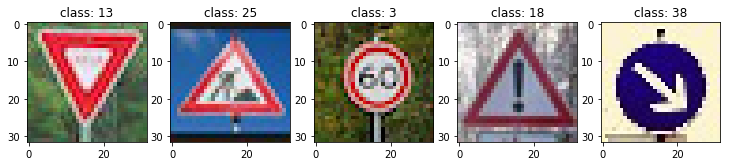

In [16]:
from IPython.display import Image
Image(filename='Images/WebImages.png')


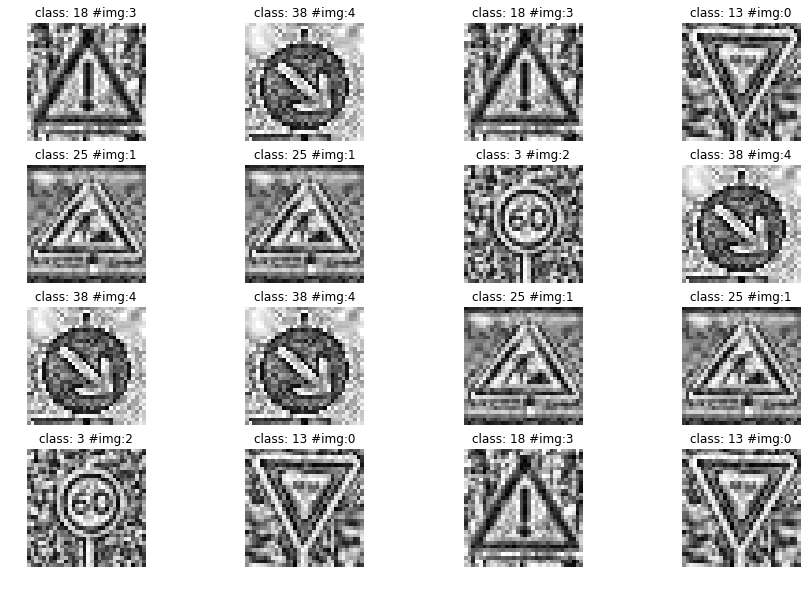

In [18]:
# These are how the images look after preprocessing.

Image(filename='Images/WebImg.png')

#### Performance of new Images

The accuracy of the model to predict the new images was 100% while it was 94.4% on the testing set thus It seems the model is overfitting.

### STEP 5: Softmax probabilities of the new images

For easier visualization, I have created a figure including original web images and the respectively class and probability given by the model. 
The first column of the graph is displaying the original image and the rest of columns show every probability 
and the class guessing by the classifier.

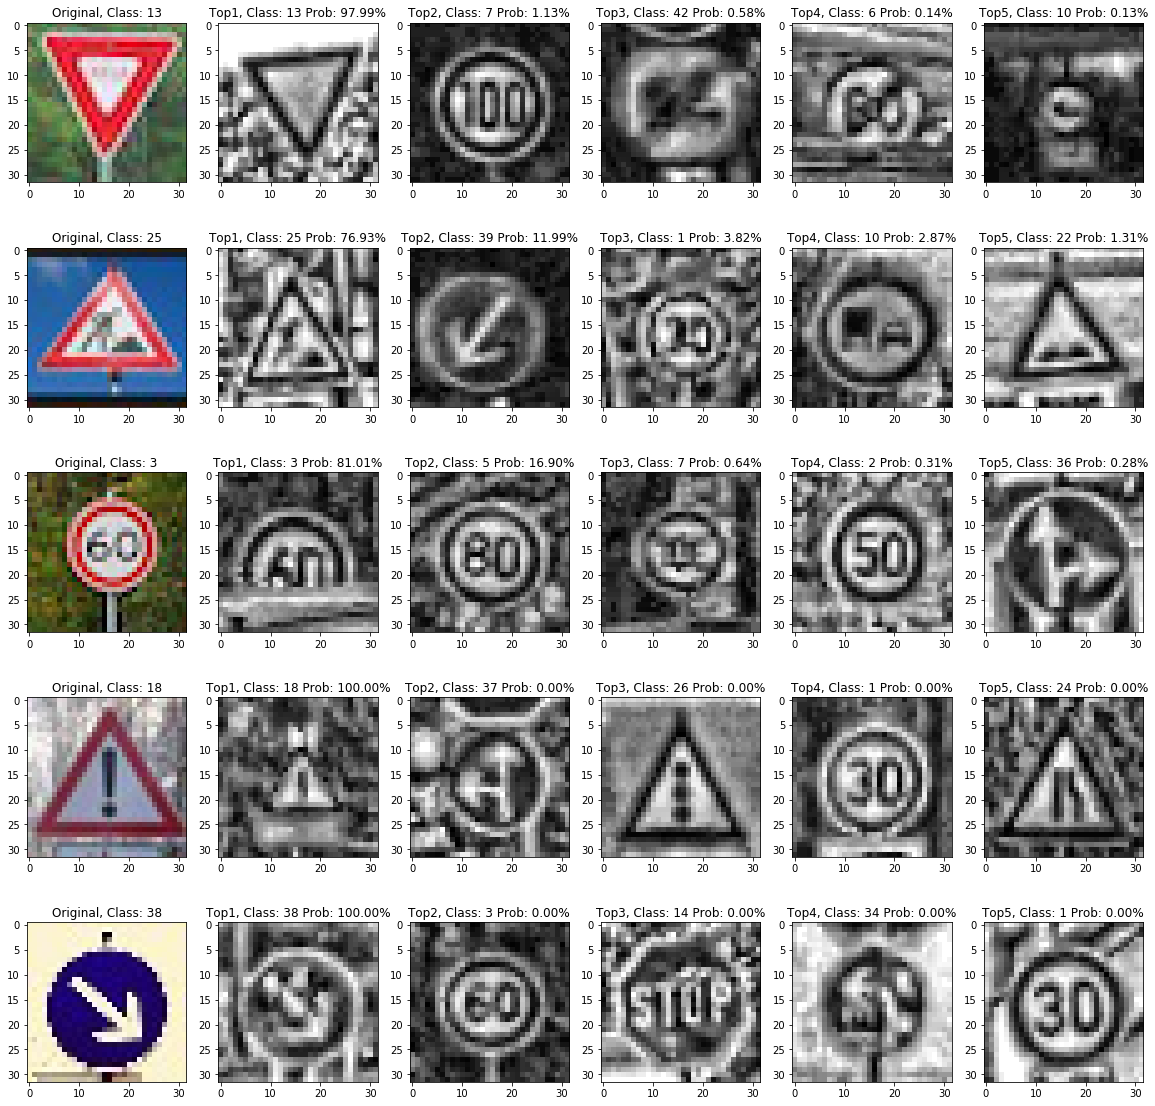

In [10]:
Image(filename='tmp/Prob.png')

### Conclusions

 1. Eventhough the model was trained with gray scale images, the accuracy achieved is a great result. In my opinion the architecture of skipping layer and third convolutional layer allowed the learning of smooth shapes.
 2. In order to improve the accuracy, more training data should be considered or apply augmentation methods to train the model.
 3. The strategy to contrast the images made that the model extracted more details where the original image did not show.
 
 In general, this is an amazing project where I have learnt too much about deep learning and how solving complex problems using it.